# Principal Component Analysis (PCA) 

In this notebook, we will cover both the theory and practical aspects of PCA. We will explore:

- The mathematical foundations of PCA
- Preprocessing and applying PCA with scikit-learn
- Visualizing PCA results in 2D and 3D
- Assessing explained variance and reconstruction error
- Advanced PCA variants such as Kernel PCA and Incremental PCA
- Integration of PCA into a machine learning pipeline
- A comparison with other dimensionality reduction methods


## Theoretical Background of PCA

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that transforms the data into a new coordinate system such that:

1. The first principal component accounts for the largest possible variance.
2. Each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

### Mathematical Steps:

1. **Centering (and Scaling):** Subtract the mean (and scale features) so that each feature contributes equally.
2. **Covariance Matrix Calculation:** Compute the covariance matrix of the data.
3. **Eigen Decomposition / SVD:** Extract eigenvalues and eigenvectors from the covariance matrix (or use Singular Value Decomposition).
   - **Eigenvectors:** Define the directions of the new feature space (the principal components).
   - **Eigenvalues:** Indicate the amount of variance carried by each component.

### Key Concepts:

- **Explained Variance:** The proportion of the dataset’s variance that lies along each principal component.
- **Scree Plot:** A graph of the eigenvalues (or explained variance ratio) used to determine the number of components to keep.
- **Loadings:** The coefficients of the original features in each principal component.
- **Reconstruction Error:** A measure of information loss when reducing the number of components.


## Dataset Overview

For demonstration, we will use the **Iris** dataset (a classic dataset for pattern recognition) which contains:

- **150 samples**
- **3 classes** (Iris species)
- **4 features**: sepal length, sepal width, petal length, petal width

Later, we will briefly discuss how to extend these techniques to higher-dimensional datasets.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

%matplotlib inline
plt.style.use('seaborn-v0_8-bright')

## Loading and Exploring the Iris Dataset

In [4]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print('Feature names:', feature_names)
print('Class names:', target_names)
print('Data shape:', X.shape)

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
display(df.head())

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']
Data shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Preprocessing

PCA is sensitive to the scale of the features. Therefore, it is important to standardize (or normalize) the data. Here we use `StandardScaler` to ensure each feature has zero mean and unit variance.

In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Scaling check
print('Mean after scaling:', np.mean(X_scaled, axis=0))
print('Standard deviation after scaling:', np.std(X_scaled, axis=0))

Mean after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviation after scaling: [1. 1. 1. 1.]


## PCA Implementation

Let’s apply PCA to reduce the dimensionality of the Iris dataset. We will start by reducing to 3 components (useful for 3D visualization) and review the explained variance.

In [7]:
# Apply PCA to reduce the data to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Analyze the explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print('Explained variance ratio:', explained_variance)
print('Cumulative explained variance:', cumulative_variance)

Explained variance ratio: [0.72962445 0.22850762 0.03668922]
Cumulative explained variance: [0.72962445 0.95813207 0.99482129]


## Scree Plot: Explained Variance vs. Number of Components

A scree plot is a useful tool to help determine the optimal number of components by plotting the explained variance ratio for each component.

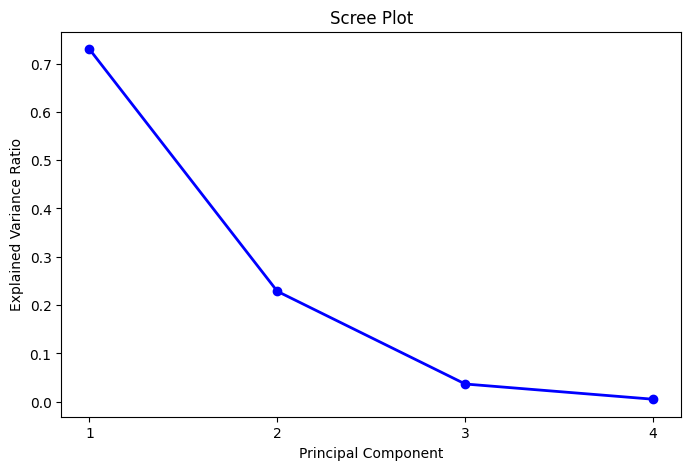

In [8]:
# No limit for the number of components
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance_full = pca_full.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_full) + 1), explained_variance_full, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_full) + 1))
plt.show()

## Visualizing PCA Results

We will now visualize the results of PCA on the Iris dataset in both 2D and 3D. This helps us understand how well the principal components separate the classes.

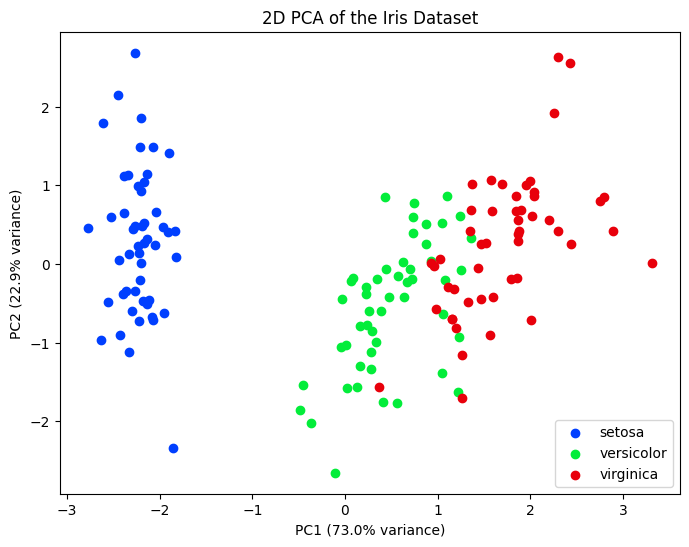

In [9]:
# 2D Visualization: First two principal components
plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(
        principal_components[y == target, 0],
        principal_components[y == target, 1],
        label=target_names[target]
    )

plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)')
plt.title('2D PCA of the Iris Dataset')
plt.legend()
plt.show()

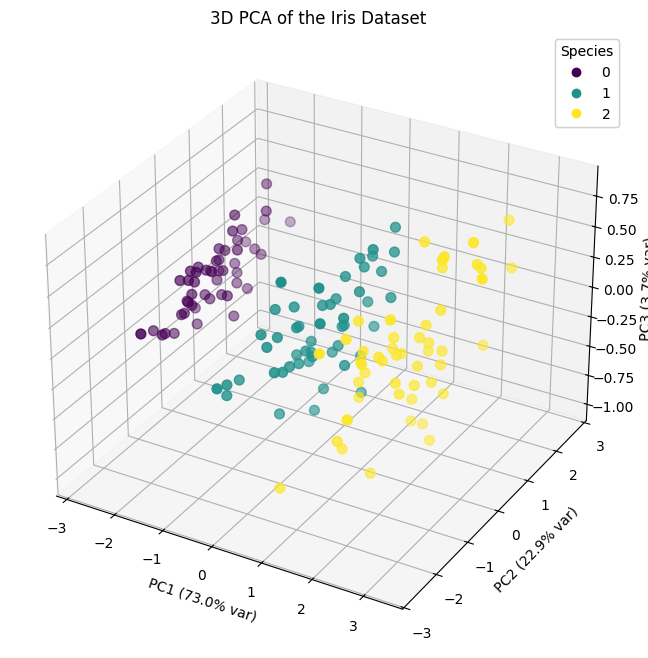

In [10]:
# 3D Visualization: First three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    principal_components[:, 0],
    principal_components[:, 1],
    principal_components[:, 2],
    c=y,
    cmap='viridis',
    s=50
)

ax.set_title('3D PCA of the Iris Dataset')
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% var)')
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% var)')
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}% var)')

legend1 = ax.legend(*scatter.legend_elements(), title='Species', loc='upper right')
ax.add_artist(legend1)
plt.show()

## Data Reconstruction from Principal Components

One of the important aspects of PCA is the ability to reconstruct the original data using only a subset of the principal components. Here, we reduce the dimensionality to 2 components, reconstruct the original data, and compute the reconstruction error (using Mean Squared Error).

In [11]:
# Reduce data to 2 components and reconstruct
n_components = 2
pca_reconstruct = PCA(n_components=n_components)
X_reduced = pca_reconstruct.fit_transform(X_scaled)
X_reconstructed = pca_reconstruct.inverse_transform(X_reduced)

# Calculate reconstruction error (Mean Squared Error)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2)
print(f'Reconstruction Error with {n_components} components:', reconstruction_error)

Reconstruction Error with 2 components: 0.041867927999983595


## Comparison with Other Dimensionality Reduction Methods

While PCA is an effective linear method for dimensionality reduction, there are alternative methods that may be more appropriate depending on the dataset and task:

| Method           | Type          | Preserves         | Complexity | Best Use Case                              |
|------------------|---------------|-------------------|------------|--------------------------------------------|
| **PCA**          | Unsupervised  | Global variance   | O(p³)      | General-purpose dimensionality reduction   |
| **t-SNE**        | Unsupervised  | Local structure   | O(n²)      | Visualization of high-dimensional data     |
| **LDA**          | Supervised    | Class separability| O(np²)     | Feature extraction for classification      |
| **Kernel PCA**   | Unsupervised  | Non-linear patterns | High     | Non-linear dimensionality reduction        |
| **Incremental PCA** | Unsupervised | Global variance  | Lower (batch-wise) | Large-scale datasets                     |


## PCA in a Machine Learning Pipeline

PCA is commonly used as a preprocessing step in machine learning pipelines to reduce dimensionality and improve computational efficiency. Below is an example that integrates PCA with a logistic regression classifier using scikit-learn's `Pipeline`.

In [13]:
# Create a pipeline: StandardScaler -> PCA -> Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('clf', LogisticRegression())
])

pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('clf', LogisticRegression())])

## Practical Considerations and Pitfalls

### When to Use PCA:
- **High-dimensional data:** When the number of features is large and many features are correlated.
- **Visualization:** To gain insights into the structure of the data by reducing it to 2 or 3 dimensions.
- **Preprocessing:** As a noise reduction step before applying other machine learning algorithms.

### When to Avoid PCA:
- **Interpretability:** When the meaning of the original features is critical.
- **Non-linear data:** When the data has complex, non-linear relationships that PCA (a linear method) cannot capture. Consider alternatives like Kernel PCA or t-SNE.
- **Outlier sensitivity:** PCA is sensitive to outliers, which can skew the results if not properly handled.

### Common Pitfalls:
- **Over-reduction:** Using too few components may result in significant information loss.
- **Ignoring scaling:** PCA assumes that the data is centered (and often scaled). Failing to do so can distort the results.
- **Misinterpreting loadings:** Remember that principal components are linear combinations of the original features and may not have direct physical meaning.